<a href="https://colab.research.google.com/github/Sirapop12345/sp/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis** ℹ

# Dataset before the preparation

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Senior Project/Dataset/original_dataset.csv')
df.head()

,text,label,prompt_name,source,RDizzl3_seven
0,Phones\n\nModern humans today are always on th...,0,Phones and driving,persuade_corpus,False
1,This essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus,False
2,Driving while the use of cellular devices\n\nT...,0,Phones and driving,persuade_corpus,False
3,Phones & Driving\n\nDrivers should not be able...,0,Phones and driving,persuade_corpus,False
4,Cell Phone Operation While Driving\n\nThe abil...,0,Phones and driving,persuade_corpus,False


In [ ]:
# Now,we see the missing values in df['text']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65508 entries, 0 to 65507
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           65360 non-null  object
 1   label          65508 non-null  int64 
 2   prompt_name    65508 non-null  object
 3   source         65508 non-null  object
 4   RDizzl3_seven  65508 non-null  bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 2.1+ MB


In [ ]:
#Checking shape of the dataset
df.shape

(65508, 5)

In [ ]:
#Check the number of each target class
df['label'].value_counts()

,count
label,
1,38137
0,27371


In [ ]:
#Since the dataset has prompt_name, so we will find out that what kind of essay that they be?
df['prompt_name'].value_counts()

,count
prompt_name,
Car-free cities,7597
Does the electoral college work?,7318
Facial action coding system,5972
Distance learning,5642
Seeking multiple opinions,5236
Driverless cars,5126
Exploring Venus,5048
The Face on Mars,4757
"""A Cowboy Who Rode the Waves""",4752


In [ ]:
df['source'].value_counts()

,count
source,
persuade_corpus,25996
Mistral7B_CME_v7,4900
Intel-neural-chat-7b-v3-1_LLMEssays_v1,3500
llama_falcon_v3_llama_70b,3500
llama_falcon_v3_falcon_180b,3500
mistral7binstruct_v1,2421
llama2_chat,2421
mistral7binstruct_v2,2421
chat_gpt_moth,2421


In [ ]:
df.groupby('source')['label'].value_counts().unstack(fill_value=0)

label,0,1
source,,
Intel-neural-chat-7b-v3-1_LLMEssays_v1,0,3500
Mistral7B_CME_v7,0,4900
NousResearch/Llama-2-7b-chat-hf,0,400
chat_gpt_moth,0,2421
cohere-command,0,350
darragh_claude_v6,0,1000
darragh_claude_v7,0,1000
falcon_180b_v1,0,1055
kingki19_palm,0,1384


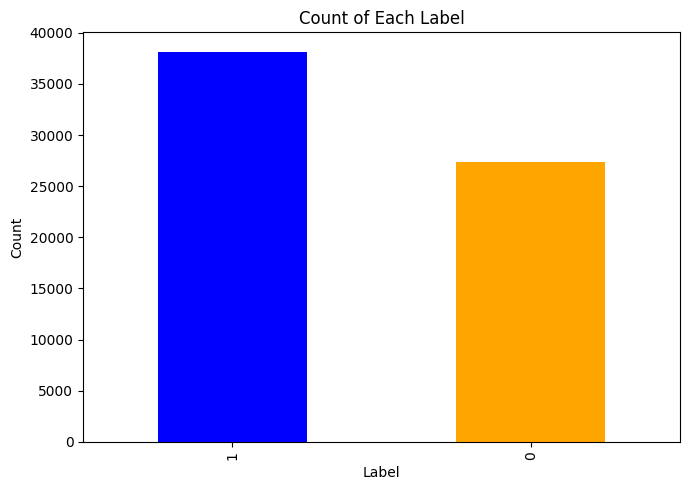

In [ ]:
import matplotlib.pyplot as plt

# Count occurrences of each label
label_counts = df['label'].value_counts()

# Plotting
label_counts.plot(kind='bar', figsize=(7, 5), color=['blue', 'orange'])

# Add labels and title
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Count of Each Label')

# Show the plot
plt.tight_layout()
plt.show()

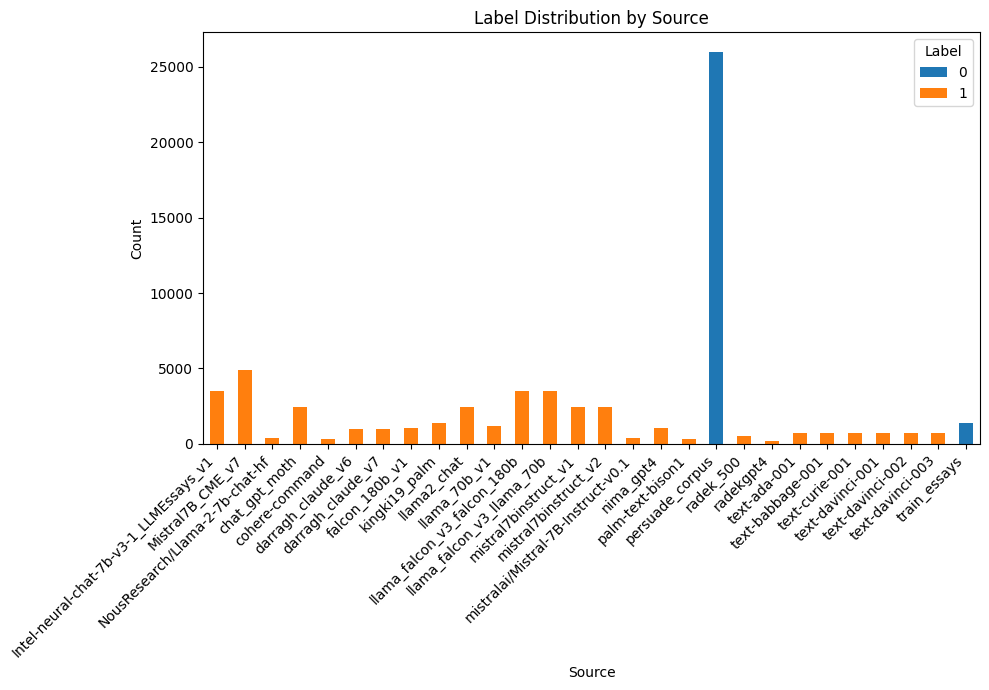

In [ ]:
import matplotlib.pyplot as plt

# Group by 'source' and 'label', and count the occurrences
grouped_df = df.groupby(['source', 'label']).size().unstack(fill_value=0)

# Plotting
grouped_df.plot(kind='bar', stacked=True, figsize=(10, 7))

# Add labels and title
plt.xlabel('Source')
plt.ylabel('Count')
plt.title('Label Distribution by Source')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Label', loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
df.groupby(['prompt_name','source'])['label'].value_counts().unstack(fill_value=0)

label                                                                 0    1
prompt_name                   source                                        
"A Cowboy Who Rode the Waves" Intel-neural-chat-7b-v3-1_LLMEssays_v1  0  500
                              Mistral7B_CME_v7                        0  700
                              chat_gpt_moth                           0   47
                              cohere-command                          0   50
                              darragh_claude_v6                       0   68
...                                                                  ..  ...
The Face on Mars              text-babbage-001                        0  100
                              text-curie-001                          0  100
                              text-davinci-001                        0  100
                              text-davinci-002                        0  100
                              text-davinci-003                        0  100

[248 rows x 2 columns]

In [ ]:
def word_count(text):
    list1 = text.split()
    return len(list1)

In [ ]:
df['text'] = df['text'].astype(str)

In [ ]:
df['word_count'] = df['text'].apply(word_count)
df['word_count'].max()

1656

In [ ]:
percentiles = df['word_count'].quantile([0.1, 0.25, 0.5, 0.75,0.8,0.85, 0.9,1])

print(percentiles)

0.10     207.0
0.25     282.0
0.50     368.0
0.75     473.0
0.80     508.0
0.85     557.0
0.90     626.0
1.00    1656.0
Name: word_count, dtype: float64


In [ ]:
df[df['word_count'] > 512].shape

(12724, 6)

In [ ]:
df[df['word_count'] > 512].head()

,text,label,prompt_name,source,RDizzl3_seven,word_count
6,Phones and Driving\n\nDriving is a good way to...,0,Phones and driving,persuade_corpus,False,604
8,People are debating whether if drivers should ...,0,Phones and driving,persuade_corpus,False,592
13,Operating a motor vehicle while on your cell p...,0,Phones and driving,persuade_corpus,False,525
15,Although cell phones have been around for quit...,0,Phones and driving,persuade_corpus,False,532
28,Phones and Driving\n\nLook around you! All you...,0,Phones and driving,persuade_corpus,False,619
